In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## <span style="background-color: #7FFFD4">SIR dynamics on star graph

Let us consider the SIR dynamics on the star graph with central node $i=1$ and leaves $i=2,3,\cdots,n$. Let $X(0)$ be such that the leave node $i=2$ is infected, and all the other nodes are susceptible, i.e., 

$$
x_2(0)=1, \quad x_i(0)=0,\ i = 1,3,\cdots,n.
$$

1. Characterize the asympyotic behaviour of the dynamics.
2. Let $R$ denote the number of nodes in recovered state. Compute the expected value of $R$.
3. Compute the distribution of $R$.

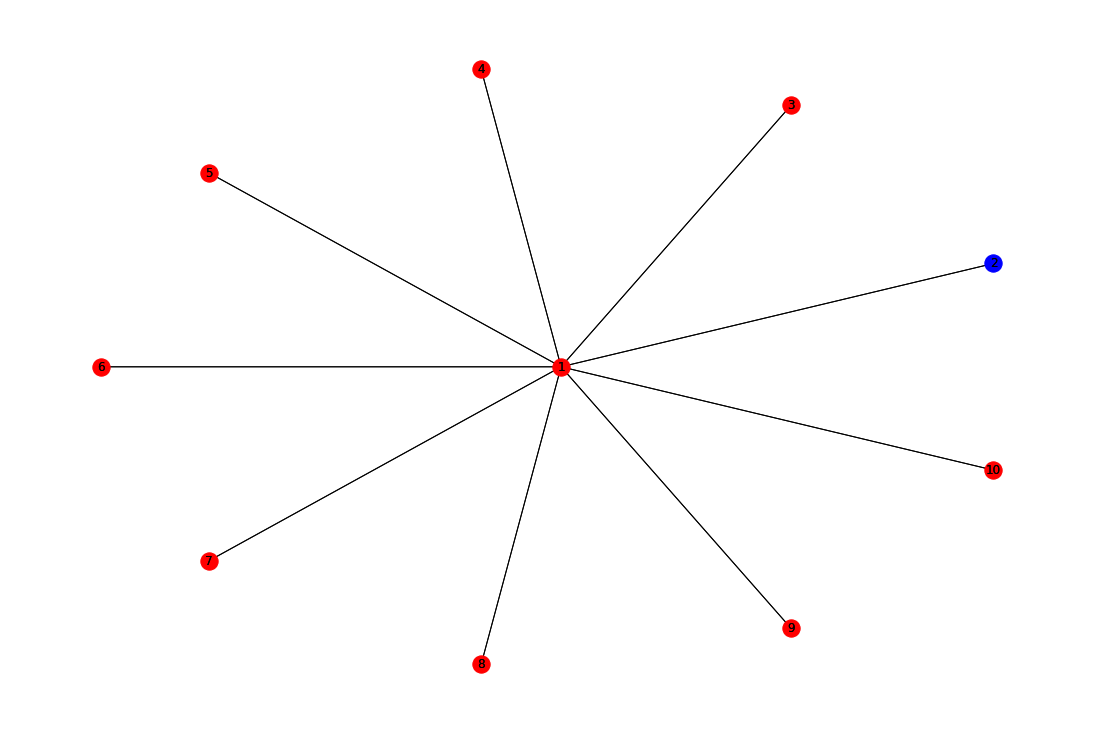

In [2]:
# Example

size = 10
G = nx.star_graph(list(np.arange(1,size+1)))

x0 = {i:0 for i in np.arange(1,size+1)}
x0[2] = 1

fig = plt.figure(figsize=(15,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G,
        pos=pos,
        with_labels=True,
        nodelist=[i for i in x0 if x0[i]==0],
        node_color = 'r')
nx.draw(G,
        pos=pos,
        with_labels=True,
        nodelist=[i for i in x0 if x0[i]==1],
        node_color = 'b')

1. We know that all the absorbing states of the SIR model are the configurations $x \in \{0,2\}^{\mathcal V}$ without infected nodes. Since the in the initial state the node $2$ is infected, in the final state node $2$ will be recovered with probability 1. The nodes $i=3,\cdots,n$ can become recovered only if node $1$ got infected, so they can be eventually recovered only if node 1 is eventually recovered. Thus, the absorbing states will be in the form

$$
x_1=2, x_i=0 \ \forall i \in \{2,\cdots,n\}
$$

or

$$
x_1=x_2=2, x_i \in \{0,2\} \ \forall i \in \{3,\cdots,n\}.
$$

2. We know that 

$$ \mathbb{P}(R \geq 1) = 1, $$

because for sure node $2$ will become recovered. In order to have other infections, it is needed that the central node $1$ gets infected. The central node is infected if the link $(1,2)$ (exponential with rate $\beta$) activates before node $2$ (rate $1$), thus

$$
\mathbb{P}(R=1) = 1/(\beta+1),
$$

whereas

$$
\mathbb{P}(R \ge 2) = \beta/(\beta+1).
$$

All the other infections will occur before the node $1$ gets recovered. Once that it is recovered, there will not be new infections all the infected nodes will eventually become recovered.
The probability that a node is recovered in the final configuration is equal to the probability that it becomes infected at a certain point. Moreover, a node $i \in \{3,\cdots,n\}$ becomes infected if the link $(1,i)$ is activated before node $1$ is activated. Hence,

$$
\mathbb{P}\left(\lim_{t\to+\infty}X_i(t)=2|\lim_{t \to+\infty} X_2(t)=2\right)=\frac{\beta}{1+\beta}\,,\qquad i=3,\ldots,n\
$$
    
We can write $R$ as

$$
R = 1 + \sum_{2 \leq i \leq n} \mathbb{I}\lbrace \lim_{t\to+\infty}X_i(t)=2\rbrace
$$
   
It follows that the expected number of recovered nodes in the final configuration is
	\begin{align*}
		\mathbb{E}[R] &= \mathbb{E}\left[ 1 + \sum_{2 \leq i \leq n} \mathbb{I}\left\{\lim_{t\to+\infty}X_i(t)=2\right\} \right] \\
		&= 1 + \sum_{2 \leq i \leq n} \mathbb{E} \mathbb{I}\left\{\lim_{t\to+\infty}X_i(t)=2\right\} \\
		&= 1 + \sum_{2 \leq i \leq n} \mathbb{P}\left(\lim_{t\to+\infty}X_i(t)=2\right) \\
		&= \underbrace{1}_{\substack{\text{node 2}}} + \underbrace{\frac{\beta}{\beta+1}}_{\substack{\text{node 1}}} +  \underbrace{\underbrace{(n-2)}_{\substack{\text{number of} \\ \text{nodes}}} \underbrace{\frac{\beta}{\beta+1}}_{\substack{\text{node 1 is} \\ \text{infected}}} \underbrace{\frac{\beta}{\beta+1}}_{\substack{\text{node $i$} \\ \text{infected}}}}_{\substack{\text{nodes $i \in$  \{3,...,$n$\}}}} \\
        &= 1 + \frac{(n-1) \beta^2+\beta}{(1 + \beta)^2} \,.
	\end{align*}
	
3. The probability that $R=1$ is equal to the probability that node $2$ activates before link $\{1,2\}$, hence

$$
\mathbb{P}(R=1) = \frac{1}{\beta+1}.
$$
	
In order to have $R \ge 2$, node $1$ has to become infected, i.e.,

$$
\mathbb{P}(R \ge 2) = \frac{\beta}{\beta+1}.
$$

Observe that the probability that a the central node inects at least another leaf when there are $j$ susceptible leaves is equal the the probability that the minimum of the activation times of $j$ links between the central node and the susceptible leaves is less than the activation time of the central node, so it is equal to

$$
\beta j/(\beta j +1).
$$

We can then write the following relation:

$$ 
\mathbb{P}(R\ge k+1|R\ge k)=\frac{(n-k)\beta}{1+(n-k)\beta}\, \quad n > k \ge 2.
$$ 

while:

$$
\mathbb{P}(R=k|R\ge k) = \frac{1}{1+(n-k)\beta},\quad n > k \ge 2.
$$

We can then write the following recursion:

$$
\mathbb{P}(R\ge k)=\mathbb{P}(R\ge2)\prod_{2\le j\le k-1} \mathbb{P}(R\ge j+1|R\ge j)=\frac{\beta}{\beta+1}
\prod_{2\le j\le k-1}\frac{(n-j)\beta}{1+(n-j)\beta}.
$$

Thus, for all $k < n$, we have

$$
\mathbb{P}(R=k)=\mathbb{P}(R=k|R\ge k) \mathbb{P}(R\ge k)= 
\frac{\beta}{\beta+1}
\prod_{2\le j\le k-1}\frac{(n-j)\beta}{1+(n-j)\beta} \cdot \frac{1}{1+(n-k)\beta}.
$$
	
If $k = n$,

$$
\mathbb{P}(R=n)= \mathbb{P}(R\ge n)= 
\frac{\beta}{\beta+1}
\prod_{2\le j\le n-1}\frac{(n-j)\beta}{1+(n-j)\beta}.
$$

**Remark: multiple Poisson clocks**. Suppose that there are $n$ Poisson clocks with rates $\lambda_1,\cdots,\lambda_n$. Then, the probability of $i$ being the first ticking clock is

$$
\frac{\lambda_i}{\sum_{j}\lambda_j}.
$$

**Limits**:
- $\beta \to 0^+$: $\mathbb{E}[R] \to 1$, 
- $\beta \to +\infty$: $\mathbb{E}[R] \to n$.




- $\beta \to 0^+$: $\mathbb{P}(R \ge 2) \to 0$, $\mathbb{P}(R = 1) \to 1$;
- $\beta \to +\infty$: $\mathbb{P}(R \ge 2) \to 1$, $\mathbb{P}(R = n) \to 1$, $\mathbb{P}(R = 1) \to 0$.